In [2]:
import pandas as pd
import numpy as np

In [3]:
weather_data_path = "C:/Users/allen/Downloads/05-2019.csv"
data = pd.read_csv(weather_data_path)
# print(data .head())

In [4]:
#carrier_code	flight_number	origin_airport	destination_airport	date	
# scheduled_elapsed_time	tail_number	departure_delay	arrival_delay	
# delay_carrier	delay_weather	delay_national_aviation_system	delay_security	
# delay_late_aircarft_arrival	cancelled_code	year	month	day	weekday	
# scheduled_departure_dt	scheduled_arrival_dt	actual_departure_dt	actual_arrival_dt	
# STATION_x	HourlyDryBulbTemperature_x	HourlyPrecipitation_x	HourlyStationPressure_x	
# HourlyVisibility_x	HourlyWindSpeed_x	STATION_y	HourlyDryBulbTemperature_y	
# HourlyPrecipitation_y	HourlyStationPressure_y	HourlyVisibility_y	HourlyWindSpeed_y

# Replace "N" with 0 and "B" with 1 in the cancelled_code column
data['cancelled_code'] = np.where(data['cancelled_code'] == 'N', 0, 1)

###### FLIGHT
flight_columns = ["flight_number", "scheduled_elapsed_time", "cancelled_code"]
flight_data = data[flight_columns]

###### WEATHER
weather_columns = [
    "HourlyDryBulbTemperature_x", 
    "HourlyPrecipitation_x", "HourlyStationPressure_x", "HourlyVisibility_x", 
    "HourlyWindSpeed_x", "HourlyDryBulbTemperature_y", 
    "HourlyPrecipitation_y", "HourlyStationPressure_y", 
    "HourlyVisibility_y", "HourlyWindSpeed_y"
]
weather_data = data[weather_columns]

# Combine all relevant columns into one DataFrame
# all_columns = flight_columns + weather_columns + ['arrival_delay']
all_columns = flight_columns + weather_columns + ['departure_delay']
combined = data[all_columns].dropna()

# Split features and target
X_flight = combined[flight_columns].values
X_weather = combined[weather_columns].values
# y = combined['arrival_delay'].values
y = combined['departure_delay'].values

# Scale as before
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_std = StandardScaler()
flight_scaled_data = scaler_std.fit_transform(X_flight)
weather_scaled_data = scaler_std.fit_transform(X_weather)

# Now both shapes will match:
# print(flight_scaled_data.shape)
# print(weather_scaled_data.shape) 

X_weather = combined[weather_columns].values

scaler_std = StandardScaler()
X_weather_scaled = scaler_std.fit_transform(X_weather)

X_weather_df = pd.DataFrame(X_weather_scaled, columns=weather_columns)


In [5]:
from random_forest import RandomForest

random_forest = RandomForest(n_estimators=50, max_depth=10, max_features=1.0, random_seed=42)

random_forest.fit(X_weather_df.values, y)

This is just for a single decision tree at a time. From the homework assignment, I just take a random tree here

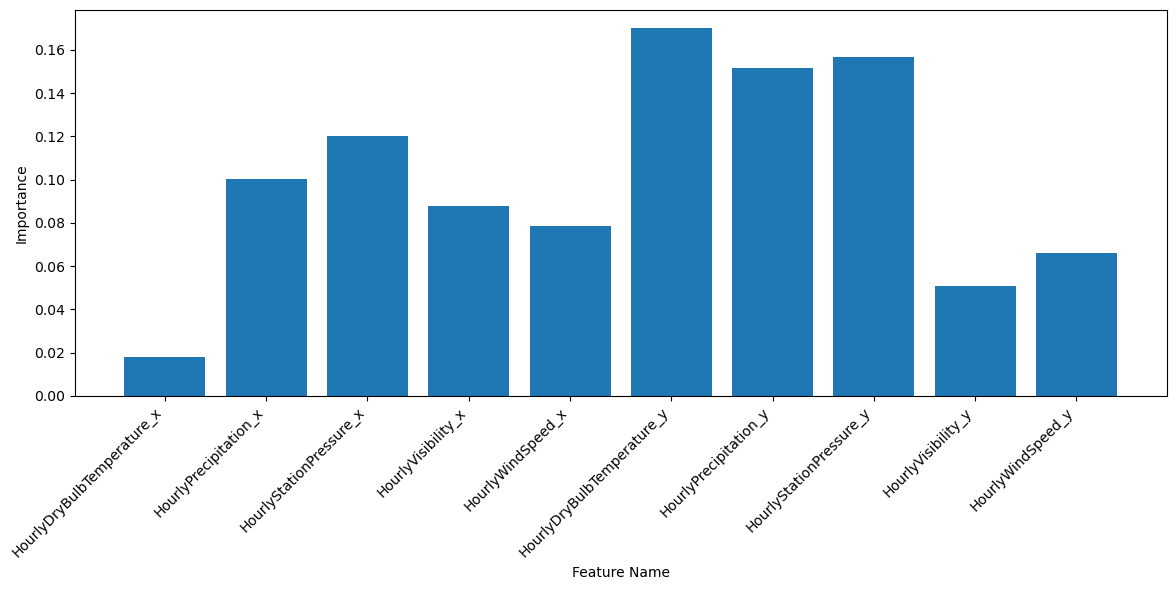

In [6]:
random_forest.plot_feature_importance(X_weather_df)

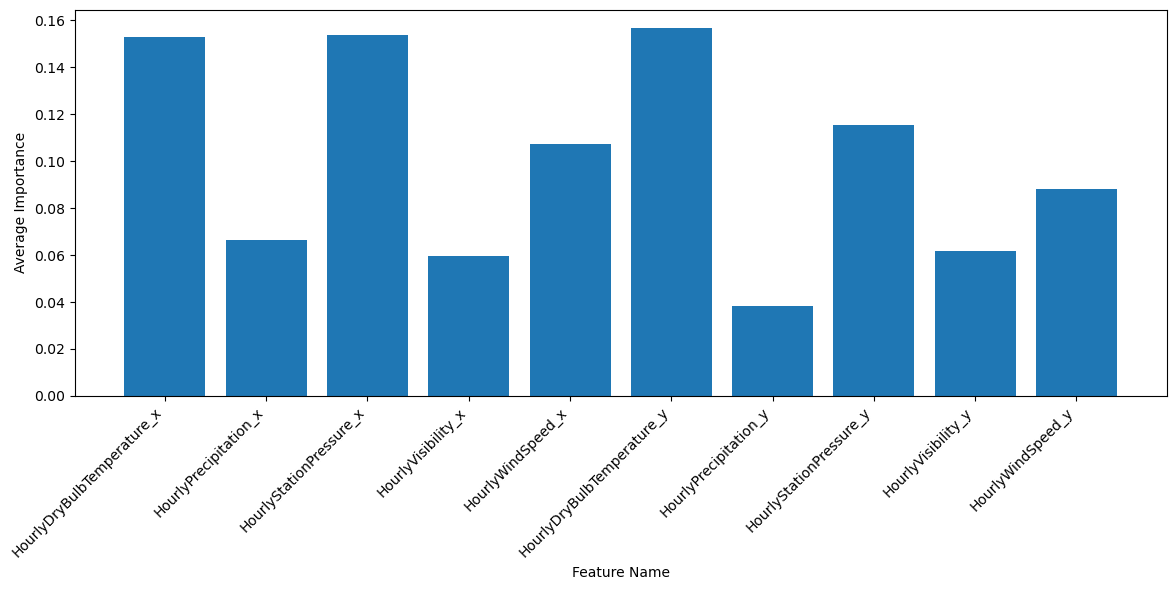

[0.15277015 0.06626117 0.15391349 0.05974618 0.10713745 0.1566311
 0.038328   0.1153723  0.06155608 0.08828408]


In [7]:
importances = random_forest.plot_average_feature_importance(X_weather_df)
print(importances)

In [9]:
feature_names = weather_columns

N = 6
top_indices = np.argsort(importances)[-N:][::-1]
top_features = [feature_names[i] for i in top_indices]

top_features_df = data[top_features]
top_features_df = data[ ['arrival_delay'] + top_features]
top_features_df.to_csv('top_weather_features.csv', index=False)